## Get Data using Kaggle API

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

%cd /content/drive/My Drive/Kaggle

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

/content/drive/My Drive/Kaggle
 86% 22.0M/25.7M [00:00<00:00, 42.0MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.9MB/s]


In [3]:
!unzip \*.zip  && rm *.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [4]:
%mkdir imdb_sentiment_analysis
%mv 'IMDB Dataset.csv' ./imdb_sentiment_analysis

## EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Kaggle/imdb_sentiment_analysis/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
len(df)

50000

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.sentiment.value_counts(normalize=True) * 100

negative    50.0
positive    50.0
Name: sentiment, dtype: float64

In [9]:
df.iloc[1,0]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [10]:
# Remove all the break tags
df.review = df.review.apply(lambda x: x.replace('<br /><br />', ''))

In [11]:
# Replace sentiments to numbers
df.sentiment = df.sentiment.replace({'positive': 1, 'negative': 0})

In [12]:
df.dtypes

review       object
sentiment     int64
dtype: object

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Histogram plot of string length of Review column**

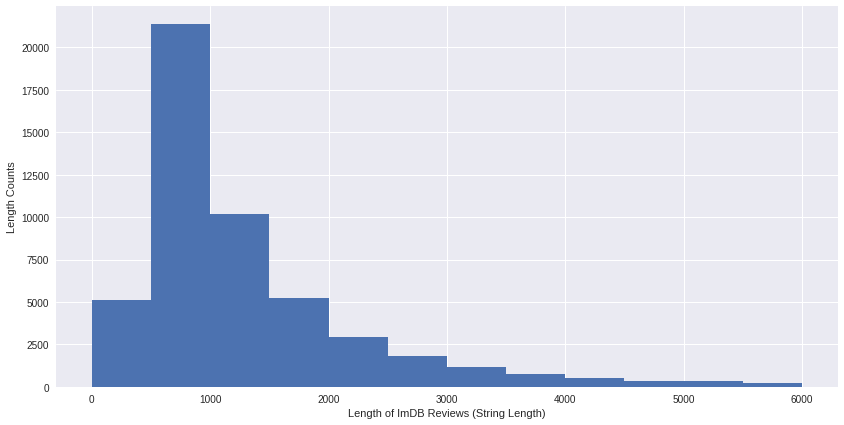

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(14,7))
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]
plt.xlabel('Length of ImDB Reviews (String Length)')
plt.ylabel('Length Counts')
plt.hist(df['review'].apply(lambda x: len(x)).tolist(), bins=bins)
plt.show()

## Data Transformation

**Train/Test Split**

In [15]:
train_df = df.iloc[:40000]
test_df = df.iloc[40000:]

In [16]:
sentiment_label = train_df.sentiment.values

In [17]:
df.review.str.len().mean()

1285.19726

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
reviews = train_df.review.values
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(reviews)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(reviews)

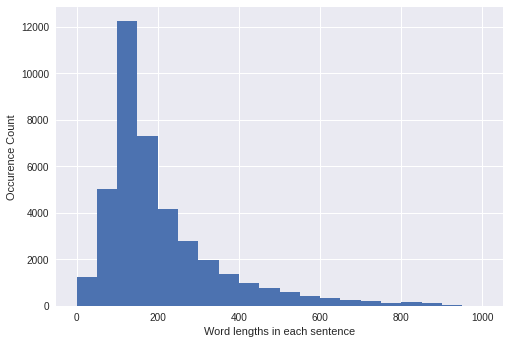

In [20]:
import numpy as np
word_len = [len(v) for v in encoded_docs]
plt.xlabel('Word lengths in each sentence')
plt.ylabel('Occurence Count')
plt.hist(word_len, bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000])
plt.show()

In [21]:
padded_sequence = pad_sequences(encoded_docs, maxlen=400)

In [22]:
len(padded_sequence)

40000

In [23]:
len(tokenizer.word_index)

113952

In [24]:
print(reviews[5])
print(encoded_docs[5])

Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.
[238, 55, 28, 54, 514, 16, 3, 63, 4, 4077, 2, 5, 3, 3524, 1131, 17, 43, 20, 37, 346, 8, 38, 110, 213, 154, 459, 55, 261, 106, 8, 45, 1090, 37, 49, 211, 7, 1, 234, 2422, 152, 839, 241, 972, 1690, 5, 55, 511, 2, 3912, 2133, 7, 26, 4, 39, 51, 170, 370, 2205, 585, 6, 3, 3067, 1, 354, 22, 13, 543, 49, 36, 1870, 52, 70, 464, 17, 11, 60, 163, 93, 4

In [25]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   26    4    1   79 2101   44 1072   11   99  146
   38  316 2966  408  455   25 3172   32   22  199   13   10    6  613
   47  604   15   67    1   86  147   11 3252   67   40 2966   12   91
    2  133    4  570   59  270    7  199   35    1  672  138 1713   67
   10    6   20    3  117   14    1 2262   37   10  117 2491   53   15
    5 

## Build Model

### RNN

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

embedding_vector_length = 32

rnn_model = Sequential()
rnn_model.add(Embedding(5000, embedding_vector_length, input_length=400))

rnn_model.add(SpatialDropout1D(0.25))

rnn_model.add(SimpleRNN(128, dropout=0.5, recurrent_dropout=0.5))

rnn_model.add(Dropout(0.2))

rnn_model.add(Dense(1, activation='sigmoid'))

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=5)
model_ckp = ModelCheckpoint('/content/drive/MyDrive/Kaggle/imdb_sentiment_analysis/rnn_best_model.h5',
                            save_best_only=True,
                            monitor='val_loss',
                            mode='auto')

rnn_model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

print(rnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 32)           160000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 400, 32)           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 128)               20608     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 180,737
Trainable params: 180,737
Non-trainable params: 0
_________________________________________________________________
None


**Training**

In [41]:
history_rnn = rnn_model.fit(padded_sequence,
                          sentiment_label,
                          validation_split=0.2,
                          callbacks=[es, model_ckp],
                          epochs=20,
                          batch_size=32)

Epoch 1/20
1000/1000 [==============================] - 143s 143ms/step - loss: 0.7438 - accuracy: 0.4999 - val_loss: 0.6947 - val_accuracy: 0.4974
Epoch 2/20
1000/1000 [==============================] - 143s 143ms/step - loss: 0.6985 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.6945 - accuracy: 0.5072 - val_loss: 0.6942 - val_accuracy: 0.5026
Epoch 4/20
1000/1000 [==============================] - 143s 143ms/step - loss: 0.6950 - accuracy: 0.5031 - val_loss: 0.6957 - val_accuracy: 0.4981
Epoch 5/20
1000/1000 [==============================] - 145s 145ms/step - loss: 0.6956 - accuracy: 0.4967 - val_loss: 0.6962 - val_accuracy: 0.5026
Epoch 6/20
1000/1000 [==============================] - 142s 142ms/step - loss: 0.6953 - accuracy: 0.5018 - val_loss: 0.6947 - val_accuracy: 0.4974
Epoch 7/20
1000/1000 [==============================] - 142s 142ms/step - loss: 0.6954 - accuracy: 0.4992 - val_

### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
#from tensorflow.compat.v1.keras.layers import CuDNNLSTM

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=400))

model.add(SpatialDropout1D(0.25))

model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=5)
model_ckp = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='auto')

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           3646496   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 3,663,147
Trainable params: 3,663,147
Non-trainable params: 0
_________________________________________________________________
None


**Training**

In [ ]:
history = model.fit(padded_sequence,
                   sentiment_label,
                   validation_split=0.2,
                   callbacks=[es, model_ckp],
                   epochs=20,
                   batch_size=32)

Epoch 1/20
1000/1000 [==============================] - 315s 315ms/step - loss: 0.4430 - accuracy: 0.7877 - val_loss: 0.3160 - val_accuracy: 0.8712
Epoch 2/20
1000/1000 [==============================] - 314s 314ms/step - loss: 0.3188 - accuracy: 0.8708 - val_loss: 0.3641 - val_accuracy: 0.8579
Epoch 3/20
1000/1000 [==============================] - 317s 317ms/step - loss: 0.3046 - accuracy: 0.8840 - val_loss: 0.3083 - val_accuracy: 0.8836
Epoch 4/20
1000/1000 [==============================] - 357s 357ms/step - loss: 0.2621 - accuracy: 0.9005 - val_loss: 0.2875 - val_accuracy: 0.8848
Epoch 5/20
1000/1000 [==============================] - 340s 340ms/step - loss: 0.2415 - accuracy: 0.9066 - val_loss: 0.3156 - val_accuracy: 0.8805
Epoch 6/20
1000/1000 [==============================] - 329s 329ms/step - loss: 0.2304 - accuracy: 0.9111 - val_loss: 0.2908 - val_accuracy: 0.8860
Epoch 7/20
1000/1000 [==============================] - 339s 339ms/step - loss: 0.2263 - accuracy: 0.9122 - val_

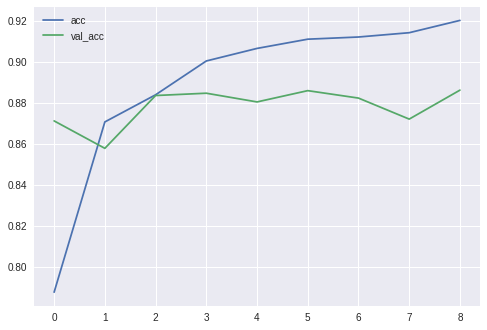

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

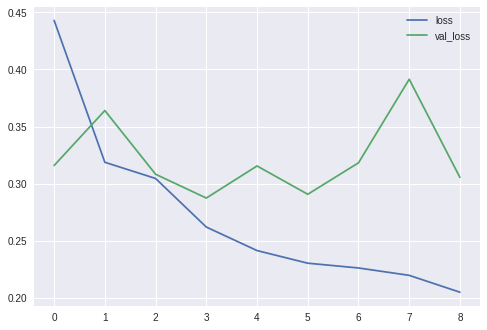

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Evaluation (LSTM)

In [ ]:
test_reviews = test_df.review.values

test_encoded_docs = tokenizer.texts_to_sequences(test_reviews)
test_padded_sequence = pad_sequences(test_encoded_docs, maxlen=400)
test_sentiment_label = test_df.sentiment.values

In [ ]:
eval = model.evaluate(test_padded_sequence,
                      test_sentiment_label,
                      batch_size=32)

313/313 [==============================] - 14s 44ms/step - loss: 0.2992 - accuracy: 0.8879


**Saving Tokenizer**

In [ ]:
import json
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

**Single Review Prediction**

In [ ]:
from keras.preprocessing.text import tokenizer_from_json
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import os

def load_tokenizer(path):
    with open(os.path.join(path,'tokenizer.json')) as f:
        data = json.load(f)
        loaded_tokenizer = tokenizer_from_json(data)
    return loaded_tokenizer

def preprocess_input(text_input, tokenizer):
    trs = tokenizer.texts_to_sequences([text_input])
    trs = pad_sequences(trs, maxlen=400)
    return trs

def predict_sentiment(model, encoded_input):
    prediction = model.predict(encoded_input).round().item()
    if prediction == 1:
        return 'positive'
    else:
        return 'negative'


if __name__ == '__main__':
    review_sent = "I watched 'The Crown' yesterday and it was a fantastic movie!"
    
    path = './model'
    tokenizer = load_tokenizer(path)
    
    loaded_model = load_model(os.path.join(path,'best_model.h5'))
    encoded_input = preprocess_input(review_sent, tokenizer)
    
    sentiment = predict_sentiment(loaded_model, encoded_input)
    print(sentiment)

positive
